In [ ]:
from PIL.Image import open
from skimage.color import rgb2grey
from superpixels import *
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

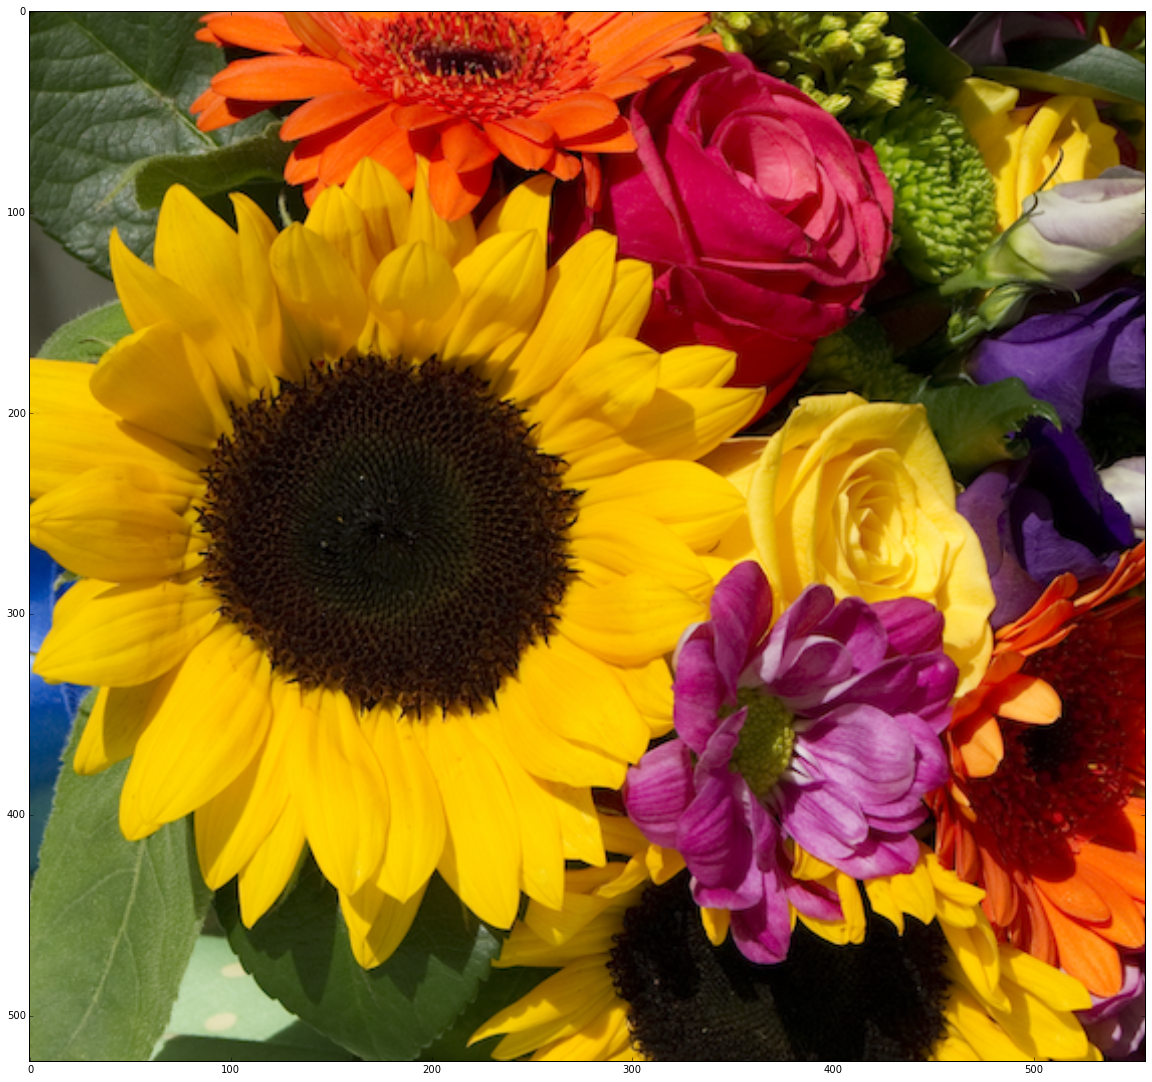

In [11]:
col_im = np.asarray(open("Flowers.tiff"))[:,:,0:3]
grey_im = rgb2grey(col_im)
# col_im = np.asarray(open("Docks.png"))
# grey_im = rgb2grey(col_im)
plt.imshow(col_im)

64 14.0


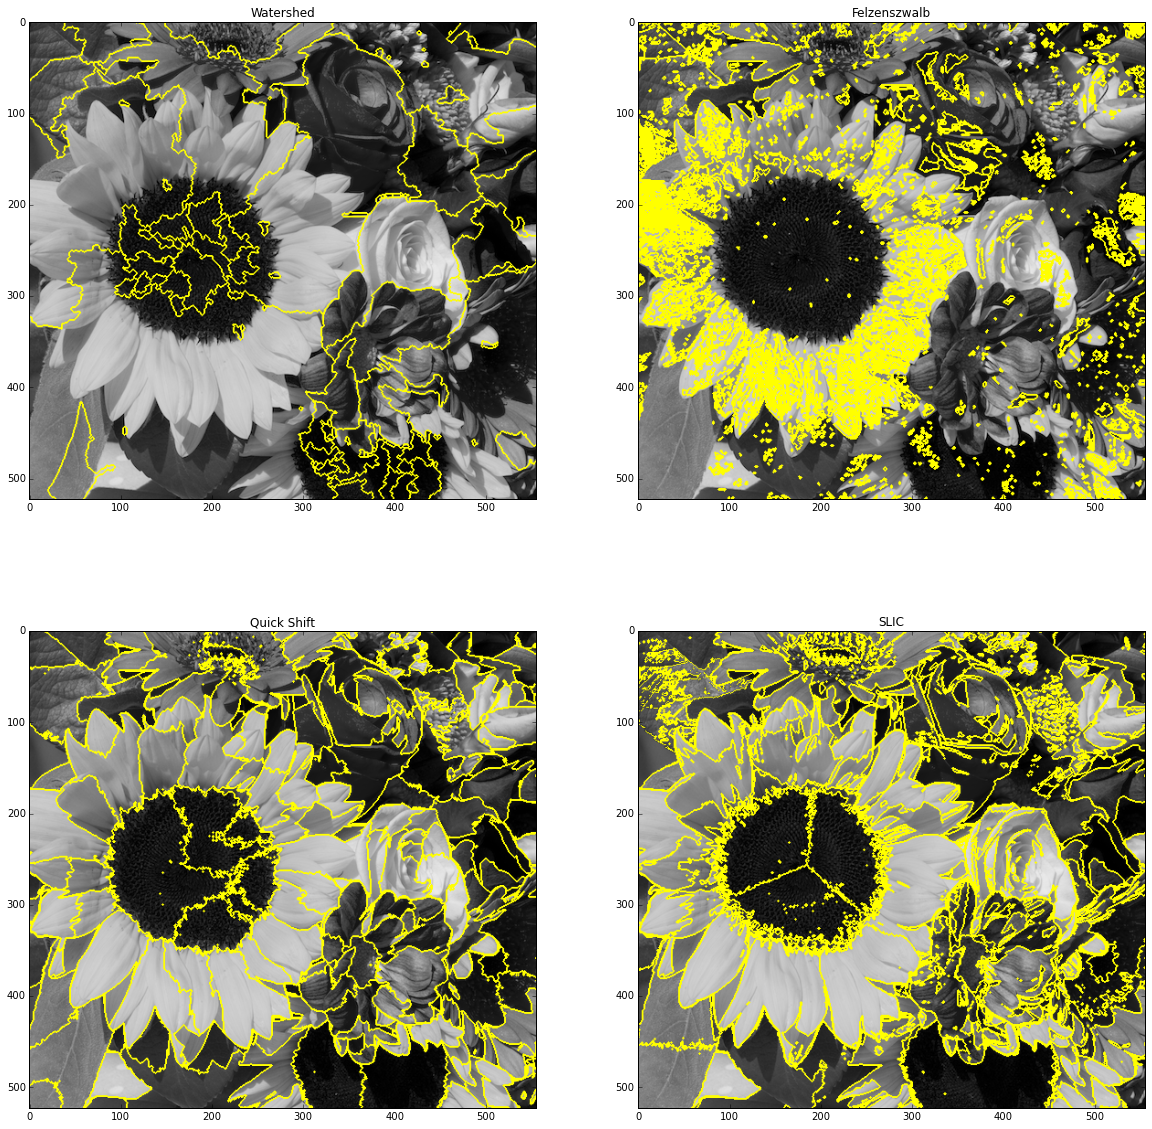

In [12]:
@interact(im=fixed(col_im),
          nMarkers=widgets.IntSlider(min=0, max=256, step=4, value=128),
          scale=widgets.FloatSlider(min=0.5, max=3, step=0.1, value=2),
          sigma=widgets.FloatSlider(min=0., max=2, step=0.1, value=0.5),
          min_size=widgets.IntSlider(min=3, max=20, step=1, value=3),
          ratio=fixed(1),
          max_dist=fixed(10),
          n_segments=widgets.IntSlider(min=8, max=256, step=8, value=64),
          compactness=widgets.FloatSlider(min=0.1, max=15, step=0.1, value=14),
          display_im=fixed(grey_im))
def all(im, nMarkers, scale, sigma, min_size, ratio, max_dist, n_segments, compactness, display_im):
    water_mark = water(im, nMarkers, display_im)
    felz_mark = felz(im, scale, sigma, min_size, display_im)
    quick_mark = quick(im, ratio, max_dist, display_im)
    slic_mark = SLIC(im,n_segments, compactness, display_im)
    
    fig, axarr = plt.subplots(2, 2)
    axarr[0, 0].imshow(water_mark)
    axarr[0, 0].set_title('Watershed')
    axarr[0, 1].imshow(felz_mark)
    axarr[0, 1].set_title('Felzenszwalb')
    axarr[1, 0].imshow(quick_mark)
    axarr[1, 0].set_title('Quick Shift')
    axarr[1, 1].imshow(slic_mark)
    axarr[1, 1].set_title('SLIC')
    